In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

# Electricity Production data

## Import data

In [22]:
df = pd.read_csv('data/Electric_Production.csv')
data = np.array(df['value'])
dataset = np.reshape(data,(-1,1)).astype('float32')
len(dataset)

397

## Data preprocessing

In [57]:
#Create dataset from raw data
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [66]:
#Data point from test_index_from is the starting index of the testing set
window_size = 15
test_index_from = int(len(dataset) * 0.75)
train, test = dataset[0:test_index_from,:], dataset[test_index_from - window_size : len(dataset),:]
trainX, trainY = create_dataset(train, window_size)
testX, testY = create_dataset(test, window_size)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))
np.savetxt("output/Elec_real.csv", testY, delimiter="\n") 

train_data_size: 1118  test_data_size: 378


# Train Model

In [61]:
vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(60, input_dim=window_size, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_absolute_error', optimizer='adam')

vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
7/7 - 2s - loss: 80.4143 - val_loss: 90.0351 - 2s/epoch - 246ms/step
Epoch 2/200
7/7 - 0s - loss: 65.4063 - val_loss: 60.9533 - 41ms/epoch - 6ms/step
Epoch 3/200
7/7 - 0s - loss: 41.0580 - val_loss: 30.1256 - 57ms/epoch - 8ms/step
Epoch 4/200
7/7 - 0s - loss: 14.9304 - val_loss: 7.7413 - 50ms/epoch - 7ms/step
Epoch 5/200
7/7 - 0s - loss: 8.1531 - val_loss: 10.5172 - 45ms/epoch - 6ms/step
Epoch 6/200
7/7 - 0s - loss: 6.0147 - val_loss: 5.3320 - 49ms/epoch - 7ms/step
Epoch 7/200
7/7 - 0s - loss: 4.5660 - val_loss: 5.3937 - 47ms/epoch - 7ms/step
Epoch 8/200
7/7 - 0s - loss: 4.2354 - val_loss: 5.2453 - 37ms/epoch - 5ms/step
Epoch 9/200
7/7 - 0s - loss: 4.2423 - val_loss: 5.3084 - 42ms/epoch - 6ms/step
Epoch 10/200
7/7 - 0s - loss: 4.1710 - val_loss: 5.0892 - 33ms/epoch - 5ms/step
Epoch 11/200
7/7 - 0s - loss: 4.1732 - val_loss: 5.0668 - 49ms/epoch - 7ms/step
Epoch 12/200
7/7 - 0s - loss: 4.0191 - val_loss: 5.0544 - 48ms/epoch - 7ms/step
Epoch 13/200
7/7 - 0s - loss: 4.0156 - va

Epoch 104/200
7/7 - 0s - loss: 2.3610 - val_loss: 3.2108 - 48ms/epoch - 7ms/step
Epoch 105/200
7/7 - 0s - loss: 2.3945 - val_loss: 2.8691 - 43ms/epoch - 6ms/step
Epoch 106/200
7/7 - 0s - loss: 2.4941 - val_loss: 3.4922 - 47ms/epoch - 7ms/step
Epoch 107/200
7/7 - 0s - loss: 2.4100 - val_loss: 2.8599 - 43ms/epoch - 6ms/step
Epoch 108/200
7/7 - 0s - loss: 2.4719 - val_loss: 3.4426 - 47ms/epoch - 7ms/step
Epoch 109/200
7/7 - 0s - loss: 2.5043 - val_loss: 2.8887 - 44ms/epoch - 6ms/step
Epoch 110/200
7/7 - 0s - loss: 2.4936 - val_loss: 3.1185 - 42ms/epoch - 6ms/step
Epoch 111/200
7/7 - 0s - loss: 2.4005 - val_loss: 2.9652 - 50ms/epoch - 7ms/step
Epoch 112/200
7/7 - 0s - loss: 2.4209 - val_loss: 2.9142 - 44ms/epoch - 6ms/step
Epoch 113/200
7/7 - 0s - loss: 2.3351 - val_loss: 2.9300 - 45ms/epoch - 6ms/step
Epoch 114/200
7/7 - 0s - loss: 2.4238 - val_loss: 3.3901 - 47ms/epoch - 7ms/step
Epoch 115/200
7/7 - 0s - loss: 2.6645 - val_loss: 2.8286 - 46ms/epoch - 7ms/step
Epoch 116/200
7/7 - 0s - los

# Make prediction

In [62]:
vanilla_predict = vanilla_lstm.predict(testX)
np.savetxt("output/Elec_LSTM.csv", vanilla_predict, delimiter="\n") 

4/4 [==============================] - 0s 4ms/step


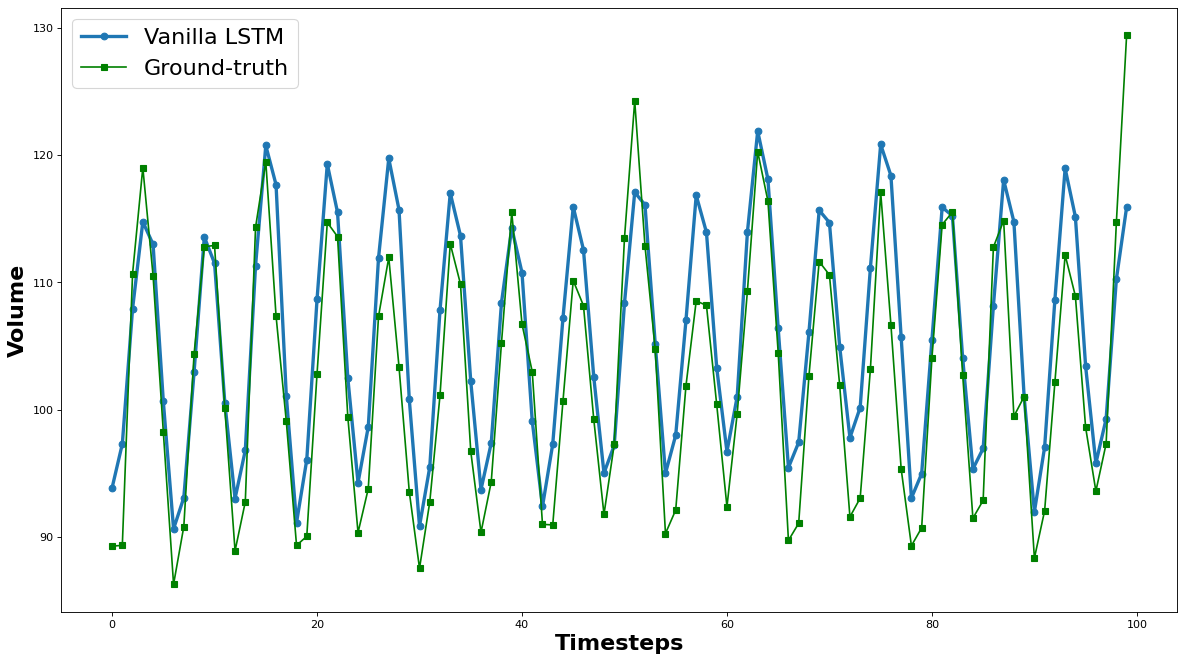

In [63]:
timesteps = 100
plt.figure(figsize=(18, 10), dpi=80)
plt.plot(vanilla_predict[0:timesteps], label = "Vanilla LSTM", marker='o', linewidth=3)
plt.plot(testY[0:timesteps], label = "Ground-truth", marker='s', color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=20)
plt.ylabel('Volume', fontweight='bold', fontsize = 20)
plt.legend(fontsize=20)
plt.show()

# Stock Volume

In [74]:
df = pd.read_csv('data/Microsoft_Stock.csv')
data = np.array(df['Volume'])
dataset = np.reshape(data,(-1,1)).astype('float32')
len(dataset)

1511

In [75]:
#Data point from test_index_from is the starting index of the testing set
window_size = 40
test_index_from = int(len(dataset) * 0.75)
train, test = dataset[0:test_index_from,:], dataset[test_index_from - window_size : len(dataset),:]
trainX, trainY = create_dataset(train, window_size)
testX, testY = create_dataset(test, window_size)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))
np.savetxt("output/Stock_volume_real.csv", testY, delimiter="\n") 

train_data_size: 1093  test_data_size: 378


In [76]:
vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(80, input_dim=window_size, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_absolute_error', optimizer='adam')

vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
24/24 - 2s - loss: 13447342.0000 - val_loss: 8883813.0000 - 2s/epoch - 78ms/step
Epoch 2/200
24/24 - 0s - loss: 9112444.0000 - val_loss: 8154486.0000 - 86ms/epoch - 4ms/step
Epoch 3/200
24/24 - 0s - loss: 8485620.0000 - val_loss: 7561039.5000 - 89ms/epoch - 4ms/step
Epoch 4/200
24/24 - 0s - loss: 8203017.5000 - val_loss: 7424083.5000 - 90ms/epoch - 4ms/step
Epoch 5/200
24/24 - 0s - loss: 7961976.0000 - val_loss: 7351028.5000 - 84ms/epoch - 4ms/step
Epoch 6/200
24/24 - 0s - loss: 7810870.5000 - val_loss: 7330894.0000 - 82ms/epoch - 3ms/step
Epoch 7/200
24/24 - 0s - loss: 7711309.5000 - val_loss: 7150984.0000 - 85ms/epoch - 4ms/step
Epoch 8/200
24/24 - 0s - loss: 7563276.5000 - val_loss: 7103529.5000 - 100ms/epoch - 4ms/step
Epoch 9/200
24/24 - 0s - loss: 7415134.5000 - val_loss: 7024069.5000 - 85ms/epoch - 4ms/step
Epoch 10/200
24/24 - 0s - loss: 7329039.0000 - val_loss: 7022751.0000 - 86ms/epoch - 4ms/step
Epoch 11/200
24/24 - 0s - loss: 7309594.0000 - val_loss: 7069832.500

Epoch 88/200
24/24 - 0s - loss: 5433318.0000 - val_loss: 6573850.0000 - 106ms/epoch - 4ms/step
Epoch 89/200
24/24 - 0s - loss: 5422294.0000 - val_loss: 6600684.5000 - 96ms/epoch - 4ms/step
Epoch 90/200
24/24 - 0s - loss: 5446597.0000 - val_loss: 6621166.0000 - 94ms/epoch - 4ms/step
Epoch 91/200
24/24 - 0s - loss: 5514696.5000 - val_loss: 6662680.0000 - 89ms/epoch - 4ms/step
Epoch 92/200
24/24 - 0s - loss: 5444621.5000 - val_loss: 6645363.5000 - 88ms/epoch - 4ms/step
Epoch 93/200
24/24 - 0s - loss: 5417478.5000 - val_loss: 6657515.5000 - 89ms/epoch - 4ms/step
Epoch 94/200
24/24 - 0s - loss: 5415045.0000 - val_loss: 6563581.5000 - 85ms/epoch - 4ms/step
Epoch 95/200
24/24 - 0s - loss: 5551898.0000 - val_loss: 6600727.5000 - 94ms/epoch - 4ms/step
Epoch 96/200
24/24 - 0s - loss: 5350718.0000 - val_loss: 6583658.0000 - 91ms/epoch - 4ms/step
Epoch 97/200
24/24 - 0s - loss: 5329892.5000 - val_loss: 6577777.0000 - 91ms/epoch - 4ms/step
Epoch 98/200
24/24 - 0s - loss: 5337929.5000 - val_loss: 66

Epoch 175/200
24/24 - 0s - loss: 4716994.5000 - val_loss: 6855869.5000 - 89ms/epoch - 4ms/step
Epoch 176/200
24/24 - 0s - loss: 4721692.5000 - val_loss: 6882948.5000 - 88ms/epoch - 4ms/step
Epoch 177/200
24/24 - 0s - loss: 4617521.0000 - val_loss: 6874404.5000 - 84ms/epoch - 3ms/step
Epoch 178/200
24/24 - 0s - loss: 4785358.5000 - val_loss: 6871486.5000 - 87ms/epoch - 4ms/step
Epoch 179/200
24/24 - 0s - loss: 4677489.5000 - val_loss: 6919980.5000 - 90ms/epoch - 4ms/step
Epoch 180/200
24/24 - 0s - loss: 4678196.0000 - val_loss: 6820368.5000 - 91ms/epoch - 4ms/step
Epoch 181/200
24/24 - 0s - loss: 4697371.0000 - val_loss: 6993120.0000 - 85ms/epoch - 4ms/step
Epoch 182/200
24/24 - 0s - loss: 4586723.0000 - val_loss: 6918148.5000 - 92ms/epoch - 4ms/step
Epoch 183/200
24/24 - 0s - loss: 4573160.0000 - val_loss: 6950241.5000 - 98ms/epoch - 4ms/step
Epoch 184/200
24/24 - 0s - loss: 4601391.0000 - val_loss: 6970909.0000 - 100ms/epoch - 4ms/step
Epoch 185/200
24/24 - 0s - loss: 4619014.0000 - v

In [77]:
vanilla_predict = vanilla_lstm.predict(testX)
np.savetxt("output/Stock_volume_LSTM.csv", vanilla_predict, delimiter="\n") 

12/12 [==============================] - 0s 2ms/step


# Stock Close Price

In [78]:
data = np.array(df['Close'])
dataset = np.reshape(data,(-1,1)).astype('float32')
len(dataset)

1511

In [79]:
#Data point from test_index_from is the starting index of the testing set
window_size = 40
test_index_from = int(len(dataset) * 0.75)
train, test = dataset[0:test_index_from,:], dataset[test_index_from - window_size : len(dataset),:]
trainX, trainY = create_dataset(train, window_size)
testX, testY = create_dataset(test, window_size)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))
np.savetxt("output/Stock_close_real.csv", testY, delimiter="\n") 

train_data_size: 1093  test_data_size: 378


In [80]:
vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(100, input_dim=window_size, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_absolute_error', optimizer='adam')

vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
24/24 - 2s - loss: 21.3562 - val_loss: 5.9991 - 2s/epoch - 67ms/step
Epoch 2/200
24/24 - 0s - loss: 2.2956 - val_loss: 3.1343 - 83ms/epoch - 3ms/step
Epoch 3/200
24/24 - 0s - loss: 1.6998 - val_loss: 3.0802 - 92ms/epoch - 4ms/step
Epoch 4/200
24/24 - 0s - loss: 1.6603 - val_loss: 3.0407 - 92ms/epoch - 4ms/step
Epoch 5/200
24/24 - 0s - loss: 1.6533 - val_loss: 3.0137 - 85ms/epoch - 4ms/step
Epoch 6/200
24/24 - 0s - loss: 1.7164 - val_loss: 3.0092 - 100ms/epoch - 4ms/step
Epoch 7/200
24/24 - 0s - loss: 1.5992 - val_loss: 2.9626 - 113ms/epoch - 5ms/step
Epoch 8/200
24/24 - 0s - loss: 1.6362 - val_loss: 3.1679 - 124ms/epoch - 5ms/step
Epoch 9/200
24/24 - 0s - loss: 1.6509 - val_loss: 2.9154 - 106ms/epoch - 4ms/step
Epoch 10/200
24/24 - 0s - loss: 1.5784 - val_loss: 2.8986 - 80ms/epoch - 3ms/step
Epoch 11/200
24/24 - 0s - loss: 1.5887 - val_loss: 2.8466 - 106ms/epoch - 4ms/step
Epoch 12/200
24/24 - 0s - loss: 1.5394 - val_loss: 2.8162 - 131ms/epoch - 5ms/step
Epoch 13/200
24/24 

Epoch 101/200
24/24 - 0s - loss: 1.0299 - val_loss: 2.6153 - 113ms/epoch - 5ms/step
Epoch 102/200
24/24 - 0s - loss: 1.0137 - val_loss: 2.0921 - 114ms/epoch - 5ms/step
Epoch 103/200
24/24 - 0s - loss: 1.0136 - val_loss: 1.8402 - 93ms/epoch - 4ms/step
Epoch 104/200
24/24 - 0s - loss: 1.0882 - val_loss: 1.9852 - 98ms/epoch - 4ms/step
Epoch 105/200
24/24 - 0s - loss: 1.0198 - val_loss: 1.9051 - 81ms/epoch - 3ms/step
Epoch 106/200
24/24 - 0s - loss: 0.9899 - val_loss: 1.8525 - 85ms/epoch - 4ms/step
Epoch 107/200
24/24 - 0s - loss: 0.9823 - val_loss: 1.8372 - 117ms/epoch - 5ms/step
Epoch 108/200
24/24 - 0s - loss: 0.9714 - val_loss: 1.9663 - 116ms/epoch - 5ms/step
Epoch 109/200
24/24 - 0s - loss: 1.0598 - val_loss: 1.8218 - 115ms/epoch - 5ms/step
Epoch 110/200
24/24 - 0s - loss: 1.0148 - val_loss: 1.9285 - 94ms/epoch - 4ms/step
Epoch 111/200
24/24 - 0s - loss: 1.0231 - val_loss: 1.8423 - 110ms/epoch - 5ms/step
Epoch 112/200
24/24 - 0s - loss: 0.9331 - val_loss: 1.8066 - 96ms/epoch - 4ms/ste

Epoch 200/200
24/24 - 0s - loss: 0.8779 - val_loss: 1.7657 - 95ms/epoch - 4ms/step


In [81]:
vanilla_predict = vanilla_lstm.predict(testX)
np.savetxt("output/Stock_close_LSTM.csv", vanilla_predict, delimiter="\n") 

12/12 [==============================] - 0s 2ms/step


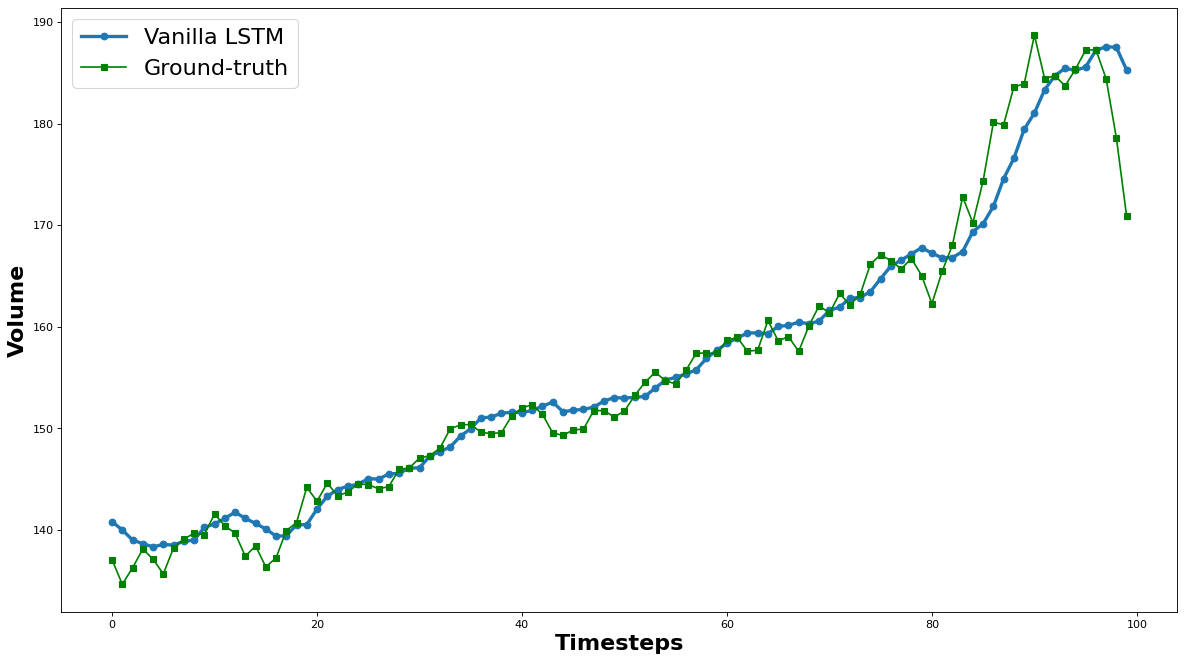

In [82]:
timesteps = 100
plt.figure(figsize=(18, 10), dpi=80)
plt.plot(vanilla_predict[0:timesteps], label = "Vanilla LSTM", marker='o', linewidth=3)
plt.plot(testY[0:timesteps], label = "Ground-truth", marker='s', color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=20)
plt.ylabel('Volume', fontweight='bold', fontsize = 20)
plt.legend(fontsize=20)
plt.show()